In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

In [2]:
cites = pd.read_stata('../data/Patent_level_data/USPatent_1926-2010/cites/cites.dta')

In [3]:
cites

,citing,cited
0,2364973,1929241
1,2364973,1917995
2,2364973,2157122
3,2364973,2173741
4,2364973,1985654
...,...,...
52519903,8087092,4658093
52519904,8087092,5440635
52519905,8087093,6201227
52519906,8087093,6075585


In [7]:
cites = cites.sort_values(['citing', 'cited'])

In [8]:
cites

,citing,cited
1,2364973,1917995
0,2364973,1929241
4,2364973,1985654
2,2364973,2157122
3,2364973,2173741
...,...,...
52519872,8087092,7653899
52519883,8087092,7739402
52519906,8087093,6075585
52519905,8087093,6201227


In [4]:
patents_firm_merge = pd.read_stata("../Data/Firm_patent/patents_firm_merge.dta")

In [10]:
patents_firm_merge = patents_firm_merge.sort_values('patnum')

In [11]:
patents_firm_merge

,index,patnum,fdate,idate,pdate,permno,patent_class,subclass,ncites,xi,year,Npats,Tcw,Tsm,tcw,tsm,_merge
400820,84,1568124,06/12/1920,01/05/1926,,12503.0,56.0,006000O,0.0,0.161681,1926,15,25.664662,4.485454,NaN,NaN,matched (3)
400807,94,1568134,09/09/1922,01/05/1926,,12503.0,239.0,584000O,0.0,0.161681,1926,15,25.664662,4.485454,NaN,NaN,matched (3)
61250,102,1568142,08/13/1920,01/05/1926,,10401.0,333.0,168000O,1.0,1.625674,1926,430,871.180249,187.894016,NaN,NaN,matched (3)
400814,123,1568163,05/03/1920,01/05/1926,,12503.0,56.0,011500O,1.0,0.161681,1926,15,25.664662,4.485454,NaN,NaN,matched (3)
527978,298,1568338,11/02/1923,01/05/1926,,14875.0,400.0,689000O,3.0,0.163435,1926,104,134.871391,5.036761,NaN,NaN,matched (3)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647954,6240100,7827611,04/12/2002,11/02/2010,02/05/2004,77976.0,726.0,024000O,0.0,105.214000,2010,56,141.172849,2406.822850,0.033356,0.568673,matched (3)
400114,6240102,7827613,10/31/2007,11/02/2010,03/06/2008,12490.0,726.0,026000O,0.0,3.318238,2010,5052,9143.233767,20864.188617,0.080591,0.183903,matched (3)
395896,6240103,7827614,05/22/2008,11/02/2010,01/01/2009,12490.0,726.0,026000O,0.0,3.318238,2010,5052,9143.233767,20864.188617,0.080591,0.183903,matched (3)
1212920,6240104,7827615,01/23/2007,11/02/2010,,39087.0,726.0,028000O,0.0,17.344980,2010,246,586.691397,5574.564518,0.011358,0.107921,matched (3)


In [26]:
def add_permno(cites, patents):
    tmp1 = pd.merge(cites, patents[['patnum', 'permno']], how='left', left_on='citing', right_on='patnum', copy=False)
    tmp1.rename(columns={'permno' : 'citing_permno'}, inplace=True).drop(columns=['patnum'])
    tmp2 = pd.merge(tmp1, patents[['patnum', 'permno']], how='left', left_on='cited', right_on='patnum', copy=False)
    tmp2.rename(columns={'permno' : 'cited_permno'}, inplace=True).drop(columns=['patnum'])
    tmp = pd.concat([tmp1, tmp2], axis=1)
    return tmp

In [20]:
cites_permno = add_permno(cites, patents_firm_merge)

In [21]:
cites_full = cites_permno.dropna()

In [27]:
cites_full.columns = ['citing','cited', 'patnum', 'citing_permno', 'citing2', 'cited2', 'patnum2', 'cited_permno']

In [29]:
cites_full.drop(columns=['patnum', 'citing2', 'cited2', 'patnum2'], inplace=True)

In [30]:
cites_full

,citing,cited,citing_permno,cited_permno
74,2415090,2274164,15480.0,15480.0
82,2415092,2066194,14525.0,14525.0
83,2415092,2091306,14525.0,14525.0
84,2415092,2143140,14525.0,14525.0
87,2415092,2207709,14525.0,14525.0
...,...,...,...,...
47428028,7827605,7461402,75607.0,18163.0
47428029,7827606,5335346,89382.0,18163.0
47428063,7827611,5771455,77976.0,49584.0
47428081,7827611,6269456,77976.0,39642.0


In [61]:
firm_df = cites_full.groupby(['citing_permno', 'cited_permno']).count().drop(columns=['cited']).rename(columns={'citing': 'ncited'}).reset_index()

In [62]:
firm_df

,citing_permno,cited_permno,ncited
0,10006.0,10006.0,96
1,10006.0,10030.0,1
2,10006.0,10102.0,3
3,10006.0,10145.0,3
4,10006.0,10153.0,4
...,...,...,...
616241,93252.0,39300.0,1
616242,93287.0,10890.0,1
616243,93287.0,12490.0,2
616244,93287.0,17590.0,1


In [63]:
firm_df.citing_permno.value_counts()

12490.0    3646
64231.0    3437
12060.0    3354
53613.0    3118
53727.0    3091
           ... 
67168.0       1
67097.0       1
16619.0       1
16548.0       1
78889.0       1
Name: citing_permno, Length: 6577, dtype: int64

In [75]:
def cite_hist(permno):
    fig, ax = plt.subplots()
    firm_df[firm_df['citing_permno'] == permno].sort_values('cited_permno').plot(x='cited_permno', y='ncited', ax=ax)
    ax.set_title(f'Histogramme des entreprises citées par {permno}')
    ax.set_xlabel(f'Index des entreprises citées par l\'entreprise {permno}')
    ax.set_ylabel('Nombre de brevets cités')
    plt.show()

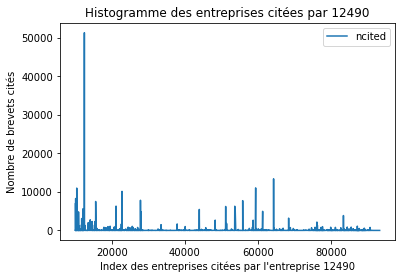

In [76]:
cite_hist(12490)

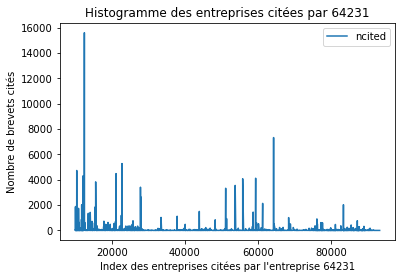

In [81]:
cite_hist(64231)

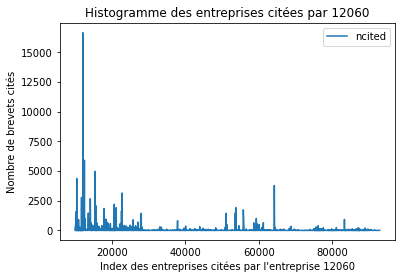

In [82]:
cite_hist(12060)